# Data Collection and Preparation

### Obtain and Load Data

In this phase, we will focus on the collection and preparation of data to be used by for learning model training. For our example to be used throughout the course, we will study how a certain dataset can be used to predict how much a house can be sold for.

The categories of data to be used are the following:
* Income of the area
* Population of the area
* House occupancy  
* Location of the house
* Number of bedrooms
* Number of rooms
* Age of the house

**Supervised Learning** - a type of machine learning where models are trained using *labeled data*, which contains target values the model learns to predict - shall be used to predict the price of the house, which in itself is a **linear regression** problem.

**Linear Regression** is a machine learning algorithm based on supervised learning and is mostly used to find the relationship between variables for forecasting.

To obtain and load the data from our local CSV file, we write the following code in Python with the utilization of **Pandas**, **Seaborn**, and **Matplotlib** libraries

In [44]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plot
%matplotlib inline

import numpy as np

In [45]:
#Read in the data with read_csv() into a Pandas Dataframe
housing_dataframe = pd.read_csv('Repo/housing.csv')

#Use info() to show the features (i.e. columns) in your dataset along with a count and datatype
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Prepare and Preprocess Data

#### Use imputation to handle missing data

For this phase, we try to check for missing data that could skew the model training. Using the isNull() and sum() functions, we can locate and count all of the entries in our data frame that has no entries (null). In this case, we have *207 cells in total_bedrooms column* that has empty/null values.

In [46]:
# isnull() function outputs a table determining if each cell in the dataframe is null (True) or not (False)
# sum() function uses the outputted table from the prior function and count the cells who returns True
housing_dataframe.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In the code below, we prepare the temporary dataframe copied from our original dataframe for imputation. For this case, we extract a list of columns containing at least one empty/null cell and updates the temporary data frame for later use.

In [47]:
from sklearn.impute import KNNImputer

# Create a temporary dataframe of the dataset
temp_housing_dataframe = housing_dataframe.copy()

# Extract columns from the temporary dataframe which contains at least one empyt/null cell
new_column_list = [col for col in temp_housing_dataframe.loc[:, temp_housing_dataframe.isnull().any()]]

# Updates the temporary dataframe with the new column list containing empty/null cells
temp_housing_dataframe = temp_housing_dataframe[new_column_list]

Upon preparation of the temporary data frame, use KNNImputer to impute the data for it using machine learning. This is accomplished by training our KNN model using the temporary dataset (containing only the column with at least one empty/null cell), transform the data of the temporary data frame, store it in an array variable, and convert the values in the array variable and set it as values for our temporary dataframe of appropriate column names

In [48]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(temp_housing_dataframe)

# transform the data using the model applies the transformation model (ie. knn) to data
array_values = knn.transform(temp_housing_dataframe)

# convert the array values to a dataframe with the appropriate column names
temp_housing_dataframe = pd.DataFrame(array_values, columns = new_column_list)

Upon the completion of the imputation through the application of the KNN transformation model, check the newly updated temporary dataframe if there are still columns with empty/null cells

In [49]:
temp_housing_dataframe.isnull().sum()

total_bedrooms    0
dtype: int64

Overlay the temporary dataframe on the original dataframe, merging both data from the temporary and old dataframe  

In [50]:
for column_name in new_column_list:
    housing_dataframe[column_name] = temp_housing_dataframe.replace(housing_dataframe[column_name], housing_dataframe[column_name])

housing_dataframe.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Imputation through KNNImputer Transformation Learning is just one of the methods to fix our datasets in scenarios where data is missing in one or more column/s of features.

### Visualize and understand data

For this step, we can use the **Matplotlib** and **Seaborne** libraries to produce production - quality visualization of the data from your DataFrame to further understand the relationship of the target variable with other features present in the dataset. For this case we will use **histograms** using Matplotlib.

Text(0, 0.5, 'Count')

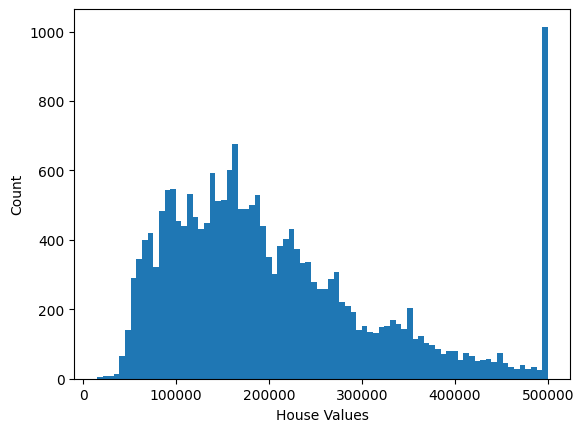

In [51]:
#Plot the distribution of the target variable (median_house_value) using a histogram

# hist() takes in two parameters: the Pandas DataFrame's target variable, and columns number represented as 'bin
plot.hist(housing_dataframe['median_house_value'], bins = 80)
plot.xlabel('House Values')
plot.ylabel('Count')

For this next one, we will create several histograms between our target variable MEDIAN_HOUSE_VALUE and all other features present in the given data frame with the exception of OCEAN_PROXIMITY

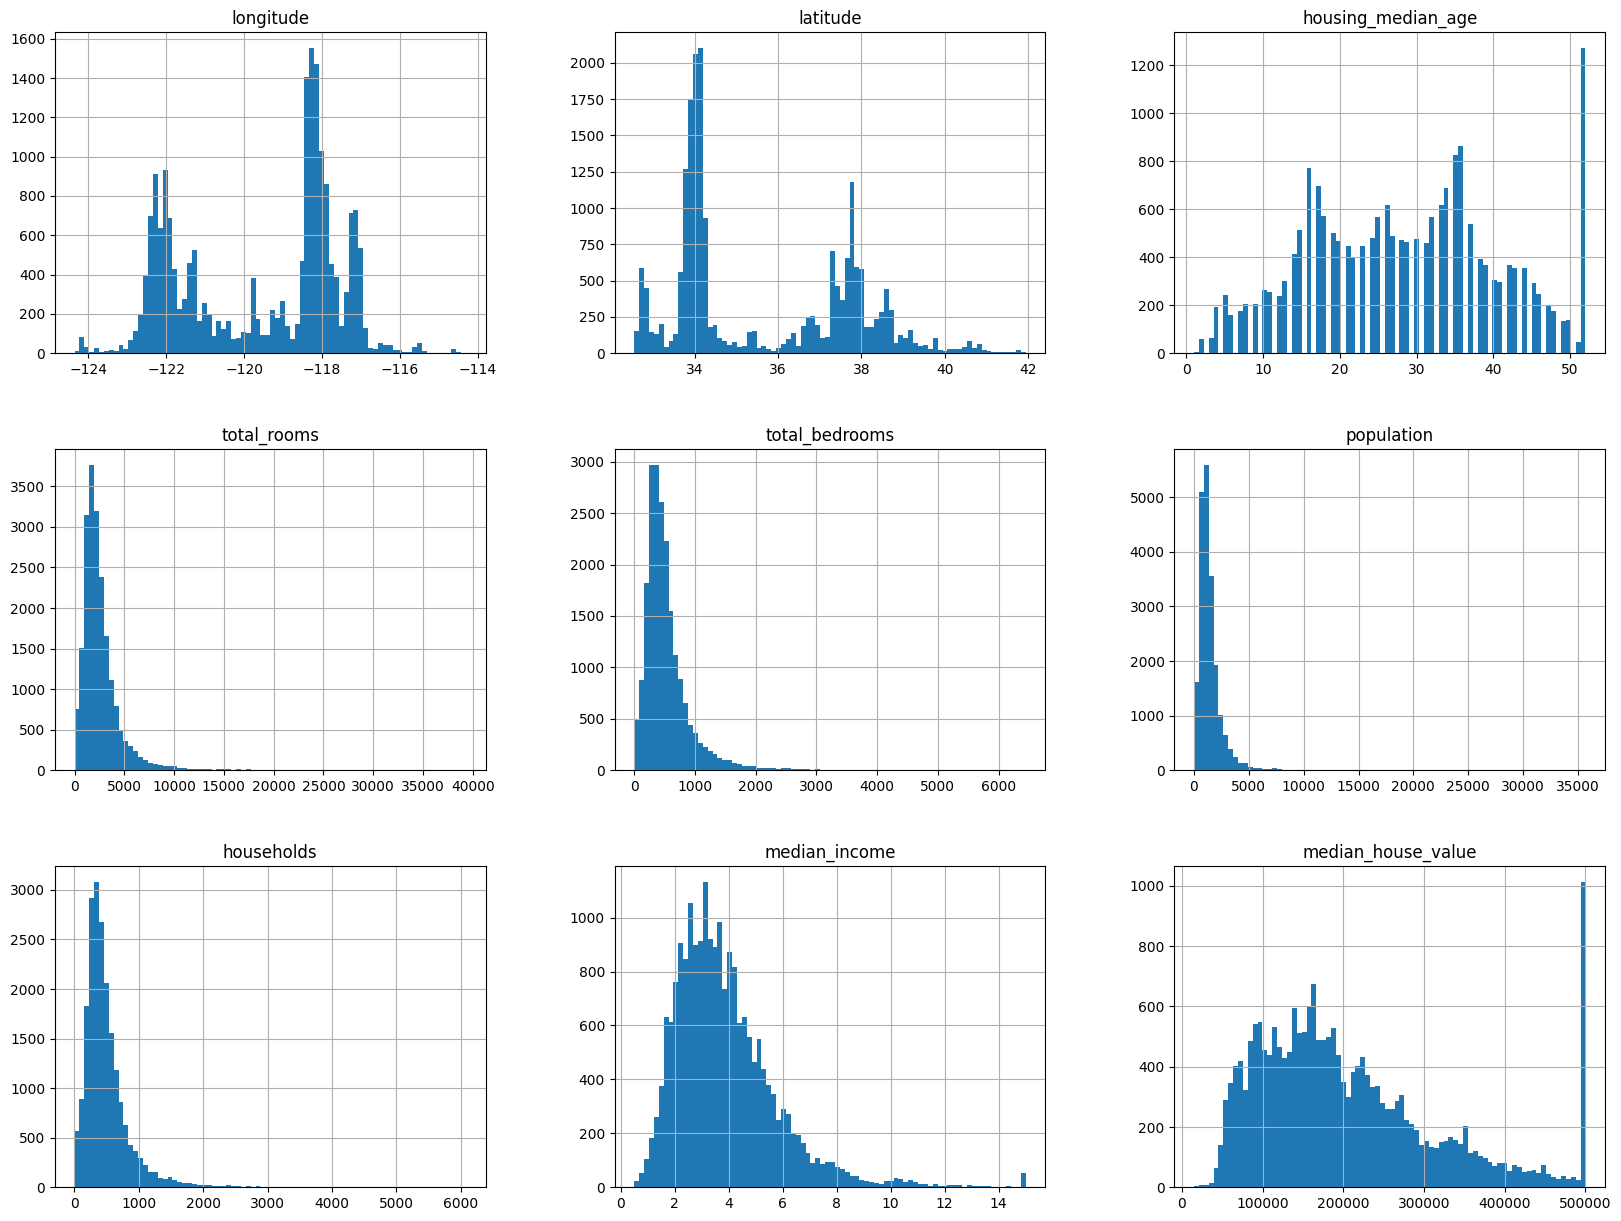

In [52]:
plots = housing_dataframe.hist( bins = 80, figsize=(20, 15))

In this case, we will now use **heatmaps** to visualize the correlation between the different features in our dataset by plotting a graphical correlation matrix for each pair of columns in the data frame. 

Note that in the first line of the code, we extracted numerical type data from our data frame and stored it in a variable named **HOUSING_DATAFRAME_NUMERICS**. This is due to the fact that we have a certain feature named OCEAN_PROXIMITY that contains String type data unnecessary for our data visualization. We then used the **HOUSING_DATAFRAME_NUMERICS** to plot the correlation in a heatmap.

In [53]:
housing_dataframe_numerics = housing_dataframe.select_dtypes(include = (np.number))
corr = housing_dataframe_numerics.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

<function matplotlib.pyplot.show(close=None, block=None)>

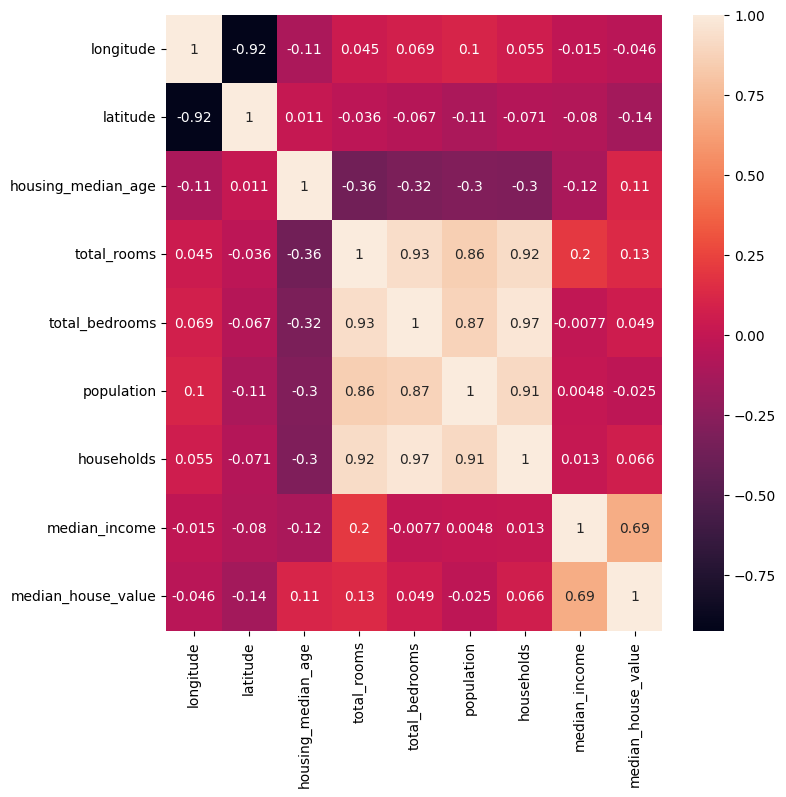

In [54]:
plot.figure(figsize = (8,8))

sns.heatmap(corr, annot = True)
plot.show

## Feature Engineering

**Feature Engineering** is the process in which we are manipulating data, adding new features, removing highly correlated features, and combining features to create new features all with a goal of *optimizing the training of our model and improve predicting capabilities*. It requires an individual to understand the data and the relationships between the features.

#### Addition, Modification, and Deletion of Data

In the preparation of our data, their are scenarios wherein one or several features present in our dataset may not prove relevant towards the training of our learning model. There are also scenarios where new features, usually based from pre-existing features of high correlational relationships, need to be created to optimize our model training. 

For our case in the preparation of our data for house cost prediction, we have concluded from our prior heatmap that several of our features (total_rooms, total_bedrooms, population, households) are of high correlational relationships. Features of high correlation are usually either removed or combined to create new features to optimize our model training.

In [55]:
#  a new feature that is a ratio of the total rooms to households
housing_dataframe['rooms_per_household'] = housing_dataframe['total_rooms']/housing_dataframe['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
housing_dataframe['bedrooms_per_room'] = housing_dataframe['total_bedrooms']/housing_dataframe['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_dataframe['population_per_household']= housing_dataframe['population']/housing_dataframe['households']

# let's combine the latitude and longitude into 1
housing_dataframe['coords'] = housing_dataframe['longitude']/housing_dataframe['latitude']

housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

With the creation of our new features, we can then remove its origin features.

In [56]:
housing_dataframe = housing_dataframe.drop('total_rooms', axis=1)
housing_dataframe = housing_dataframe.drop('households', axis=1)
housing_dataframe = housing_dataframe.drop('total_bedrooms', axis=1)
housing_dataframe = housing_dataframe.drop('population', axis=1)
housing_dataframe = housing_dataframe.drop('longitude', axis=1)
housing_dataframe = housing_dataframe.drop('latitude', axis=1)

housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


With the successful feature engineering of our data frame, we can now create a heat map showing the correlation of our features to check if we have reduced the number of features of high correlation.

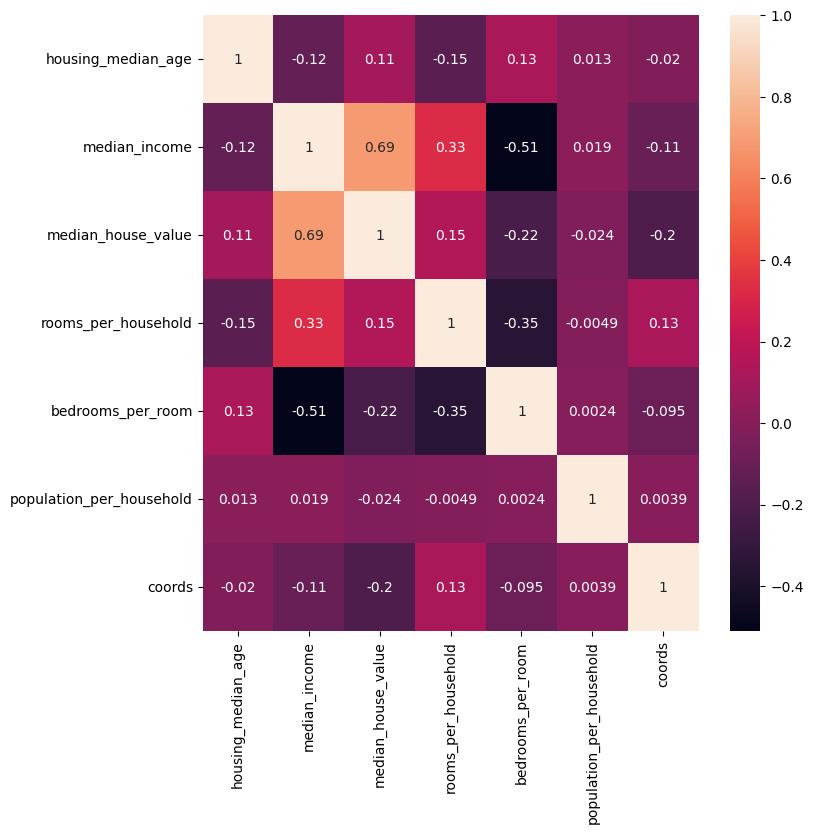

In [57]:
housing_dataframe_numerics = housing_dataframe.select_dtypes('float')
corr = housing_dataframe_numerics.corr()
plot.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plot.show()

Most machine learning algorithms can only learn using numerical data, considering it uses mathematics to learn. Categorical data, such as that of **OCEAN_PROXIMITY**, need to be encoded from an object data type into numerical data in the form of a float dat type to be actually used for training our model.

In [58]:
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


To achieve this, we can identify the unique values found in **OCEAN_PROXIMITY** into its own features with binary values (1/0). These unique values will become new features upon using Pandas later.

In [59]:
housing_dataframe.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [60]:
housing_dataframe['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [61]:
print(pd.get_dummies(housing_dataframe['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [62]:
housing_dataframe_encoded = pd.get_dummies(data = housing_dataframe, columns = ['ocean_proximity'])
housing_dataframe_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


*This ends our feature engineering phase. We have added 5 new features, and removed 1. Note that more features means our model will find it harder to train itself and recognize pattern. Feature engineering serves as a way to optimize our dataset to better serve the training process of our model*

# Training the Model